<a href="https://colab.research.google.com/github/SonalSavaliya/Glaucoma-Detection-and-Classification/blob/master/Classification_of_Glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the Keras libraries and packages
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History 
history = History()

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#lists the content of your google drive
!ls "/content/drive/My Drive/"

'All Projects Data'   Home		      Phase2
'Colab Notebooks'    'MS Sem 1 - Fall 2017'   Projects


In [0]:
#### For Colab
train_path = "/content/drive/My Drive/Phase2/Train"
test_path = "/content/drive/My Drive/Phase2/Test"
valid_path = "/content/drive/My Drive/Phase2/Validation"

#### For Local Host
#train_path = "Drishti_ROI/Train"
#test_path = "Drishti_ROI/Test"
#valid_path = "Drishti_ROI/Validation"
                                         

In [0]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes =['Mild_ROI','Moderate_ROI','Severe_ROI'], batch_size=32)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes =['Mild_ROI','Moderate_ROI','Severe_ROI'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes =['Mild_ROI','Moderate_ROI','Severe_ROI'], batch_size=32)

Found 54 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


In [0]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")
  
  print(cm)
  
  thresh = cm.max() / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
  

# Build Fine_Tuned Model with VGG-16

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
model.add(Dense(3, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

## Train Fine_Tuned Model with VGG-16

In [0]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#model.fit_generator(train_batches, steps_per_epoch = 4, epochs = 10, validation_data = test_batches, validation_steps = 4, verbose = 2)

history = model.fit_generator(train_batches, 
                    steps_per_epoch=10, 
                    validation_data = valid_batches,
                    validation_steps=10,
                    epochs=50,
                    verbose=2)

Epoch 1/50
 - 18s - loss: 3.4510 - acc: 0.1268 - val_loss: 1.9597 - val_acc: 0.2941
Epoch 2/50
 - 7s - loss: 1.3906 - acc: 0.4019 - val_loss: 1.0297 - val_acc: 0.5294
Epoch 3/50
 - 8s - loss: 0.8045 - acc: 0.6656 - val_loss: 1.0810 - val_acc: 0.5294
Epoch 4/50
 - 10s - loss: 0.7084 - acc: 0.6879 - val_loss: 0.8370 - val_acc: 0.5882
Epoch 5/50
 - 10s - loss: 0.6407 - acc: 0.6478 - val_loss: 0.7773 - val_acc: 0.7059
Epoch 6/50
 - 10s - loss: 0.6027 - acc: 0.6954 - val_loss: 0.7904 - val_acc: 0.7059
Epoch 7/50
 - 10s - loss: 0.5479 - acc: 0.7720 - val_loss: 0.7446 - val_acc: 0.7059
Epoch 8/50
 - 10s - loss: 0.5140 - acc: 0.7675 - val_loss: 0.7013 - val_acc: 0.7647
Epoch 9/50
 - 10s - loss: 0.4811 - acc: 0.8032 - val_loss: 0.6852 - val_acc: 0.7353
Epoch 10/50
 - 10s - loss: 0.4444 - acc: 0.7942 - val_loss: 0.6522 - val_acc: 0.7353
Epoch 11/50
 - 10s - loss: 0.4101 - acc: 0.8229 - val_loss: 0.6210 - val_acc: 0.7647
Epoch 12/50
 - 11s - loss: 0.3886 - acc: 0.8414 - val_loss: 0.6039 - val_acc

## Predict Fine_Tuned Model with VGG-16

In [0]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if(ims.shape[-1] != 3):
      ims = ims.transpose ((0,2,3,1))
  f = plt.figure(figsize = figsize)
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
  for i in range(len(ims)):
    sp = f.add_subplot (rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize =10)
    plt.imshow(ims[i], interpolation=None if interp else 'none')
    

In [0]:
test_batches_fine = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes =['Mild_ROI','Moderate_ROI','Severe_ROI'], batch_size=50)

Found 20 images belonging to 3 classes.


In [0]:
test_imgs, test_labels = next(test_batches_fine)

[0 1 0 1 1 0 1 2 0 1 0 0 1 0 0 0 0 0 0 1]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


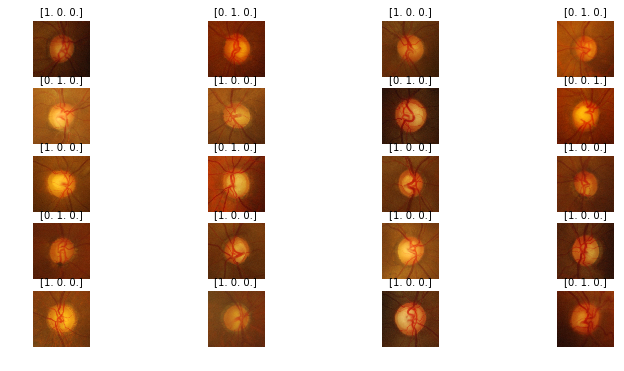

In [0]:

x_labels = test_labels.argmax(axis=1)
print(x_labels)
plots(test_imgs, titles=test_labels)

In [0]:
#test_labels = test_labels[:,0]
x_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [0]:
predictions = model.predict_generator(test_batches_fine, steps=1, verbose=0)

In [0]:
y_labels = predictions.argmax(axis=1)
y_labels
#np.round(predictions[:,0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0])

In [0]:
cm = confusion_matrix(x_labels, y_labels)

In [0]:
cm_plot_labels = ['Mild','Moderate','Severe']

Confusion Matrix without normalization
[[10  1  1]
 [ 7  0  0]
 [ 1  0  0]]


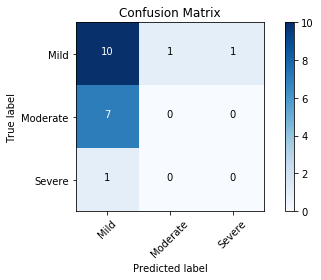

In [0]:
plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')

# New Section

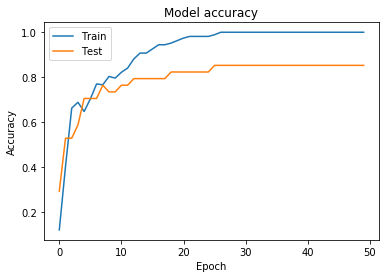

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

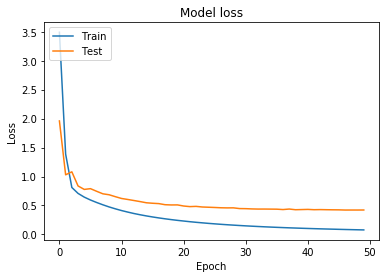

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()